<a href="https://colab.research.google.com/github/fablelamb/ML-MiniProject/blob/main/FakeNewsDetectionB6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
!pip install -q -U scikit-learn matplotlib seaborn nltk


In [ ]:
#Load the uploaded dataset
from google.colab import files
import pandas as pd
import io
df=pd.read_csv("train.csv")
df.head

<bound method NDFrame.head of           id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiumnews.com   
3                                Jessica Purkiss   
4                                 Howard Portnoy   
...                                          ...   
20795                              Jerome Hudson   
20796                           Benjamin Hoffman   
20797  Michael J. de la Merced and Rachel Abrams   
20798                                Alex Ansary   
20799                              David Swanson   

                                                    text  label  
0      House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1      Ever get the feeling your life circles the rou...      0  
2      Why the Truth Might Get You Fired October 29, ...      1  
3      Videos 15 Civilians Killed In Single US Airstr...      1  
4      Print \nAn Iranian woman has been sentenced to...      1  
...                                                  ...    ...  
20795  Rapper T. I. unloaded on black celebrities who...      0  
20796  When the Green Bay Packers lost to the Washing...      0  
20797  The Macy’s of today grew from the union of sev...      0  
20798  NATO, Russia To Hold Parallel Exercises In Bal...      1  
20799    David Swanson is an author, activist, journa...      1  

[20800 rows x 5 columns]>

In [ ]:
#Preprocess the dataset
import string

# Remove rows with missing values in 'text' and 'label' columns
df = df.dropna(subset=['text', 'label'])

# Remove duplicates
df = df.drop_duplicates()

# Text cleaning function
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = ''.join([char for char in text if char not in string.punctuation])  # Remove punctuation
    return text

# Apply the cleaning function to the 'text' column
df['cleaned_text'] = df['text'].apply(clean_text)

# Check the cleaned data
df.head()


,id,title,author,text,label,cleaned_text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,house dem aide we didn’t even see comey’s lett...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,why the truth might get you fired october 29 2...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,videos 15 civilians killed in single us airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,print \nan iranian woman has been sentenced to...


In [ ]:
# Encode the labels
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode labels as 0 for fake and 1 for real
df['label'] = label_encoder.fit_transform(df['label'])

# Check the label encoding
df[['label', 'text']].head()


,label,text
0,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,0,Ever get the feeling your life circles the rou...
2,1,"Why the Truth Might Get You Fired October 29, ..."
3,1,Videos 15 Civilians Killed In Single US Airstr...
4,1,Print \nAn Iranian woman has been sentenced to...


In [ ]:
#Feature extraction using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the cleaned text data
X = tfidf_vectorizer.fit_transform(df['cleaned_text']).toarray()

# Get the target labels
y = df['label'].values


In [ ]:
#Split the data into training and test sets
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the splits
print(X_train.shape, X_test.shape)


(16608, 5000) (4153, 5000)


In [ ]:
# Train a Machine Learning model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report and confusion matrix
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))


Accuracy: 94.46%

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94      2079
           1       0.93      0.96      0.95      2074

    accuracy                           0.94      4153
   macro avg       0.94      0.94      0.94      4153
weighted avg       0.94      0.94      0.94      4153


Confusion Matrix:
 [[1941  138]
 [  92 1982]]


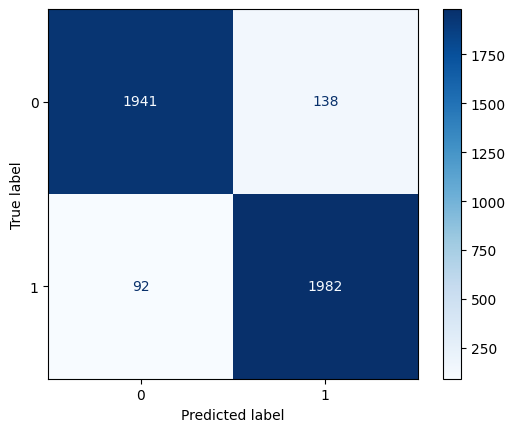

In [ ]:
#Visualize the results
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_).plot(cmap='Blues')

# Show the plot
plt.show()


In [ ]:
#Save and load the model
import joblib

# Save the trained model and vectorizer
joblib.dump(model, 'fake_news_model.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

# To load the saved model
# loaded_model = joblib.load('fake_news_model.pkl')
# loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [ ]:
#Make predictions on new articles
# Example new article
new_article = ["All 100 Senators Contacted Russian Government This Week"]

# Clean and vectorize the new article
new_article_cleaned = [clean_text(article) for article in new_article]
new_article_vectorized = tfidf_vectorizer.transform(new_article_cleaned).toarray()

# Make prediction
prediction = model.predict(new_article_vectorized)
print(f"Prediction: {'Real' if prediction == 1 else 'Fake'}")


Prediction: Real


<ipython-input-17-3ff14c049bc9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prediction_counts.index, y=prediction_counts.values, palette='Blues_d')


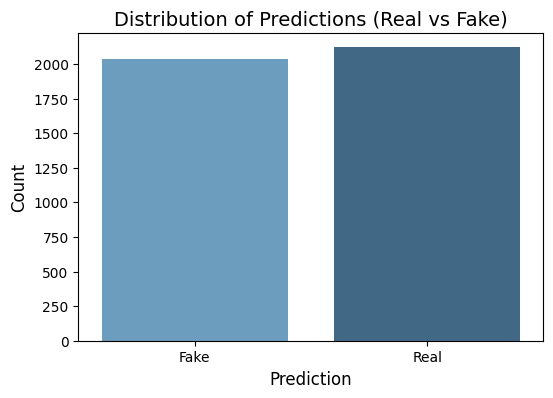

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of predictions for each class (Real vs Fake)
prediction_counts = pd.Series(y_pred).value_counts()

# Create the bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=prediction_counts.index, y=prediction_counts.values, palette='Blues_d')

# Set plot labels and title
plt.title('Distribution of Predictions (Real vs Fake)', fontsize=14)
plt.xlabel('Prediction', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Fake', 'Real'], rotation=0)  # Replace indices with labels for clarity

# Show the plot
plt.show()


<ipython-input-18-7c9694e14575>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=true_label_counts.index, y=true_label_counts.values, palette='Blues_d')


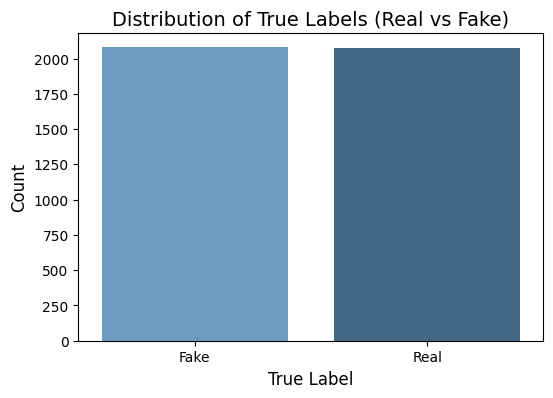

In [ ]:
# Count the number of true labels for each class (Real vs Fake)
true_label_counts = pd.Series(y_test).value_counts()

# Create the bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=true_label_counts.index, y=true_label_counts.values, palette='Blues_d')

# Set plot labels and title
plt.title('Distribution of True Labels (Real vs Fake)', fontsize=14)
plt.xlabel('True Label', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Fake', 'Real'], rotation=0)  # Replace indices with labels for clarity

# Show the plot
plt.show()
